In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data-science-project/spam.csv', encoding = "ISO-8859-1")

In [ ]:
df.head()
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4395,ham,Dear :-/ why you mood off. I cant drive so i b...,NaN,NaN,NaN
3958,ham,Have a nice day my dear.,NaN,NaN,NaN
5080,ham,"Yeah, give me a call if you've got a minute",NaN,NaN,NaN
4542,ham,I've been trying to reach him without success,NaN,NaN,NaN
2484,ham,Only if you promise your getting out as SOON a...,NaN,NaN,NaN
287,ham,hi baby im cruisin with my girl friend what r ...,NaN,NaN,NaN
632,ham,Oh that was a forwarded message. I thought you...,NaN,NaN,NaN


In [ ]:
df.shape


(5572, 5)

DATA CLEANING


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
1153,spam,1000's of girls many local 2 u who r virgins 2...
5521,ham,You are a big chic. Common. Declare
1592,ham,Will it help if we propose going back again to...
200,ham,I sent you &lt;#&gt; bucks
1827,ham,Hey gorgeous man. My work mobile number is. Ha...


In [ ]:
#renameing the col
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
742,ham,Just got up. have to be out of the room very s...
2866,ham,"Mum, i've sent you many many messages since i ..."
4183,ham,I just really need shit before tomorrow and I ...
389,ham,Yup having my lunch buffet now.. U eat already?
1472,ham,Just sent you an email ÛÒ to an address with ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])


In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#check for duplicate value
df.duplicated().sum()

403

In [ ]:
# remove duplicate
df=df.drop_duplicates(keep= 'first')

In [ ]:
df.shape


(5169, 2)

EDA


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5c93d19520>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

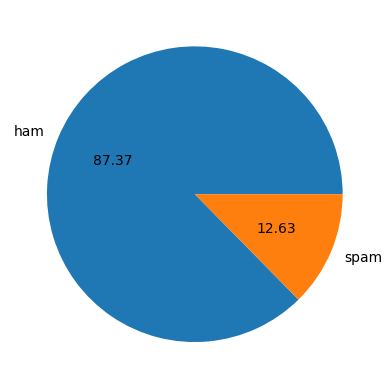

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [ ]:
#data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [ ]:
df['num_characters'] = df['text'].apply(len)

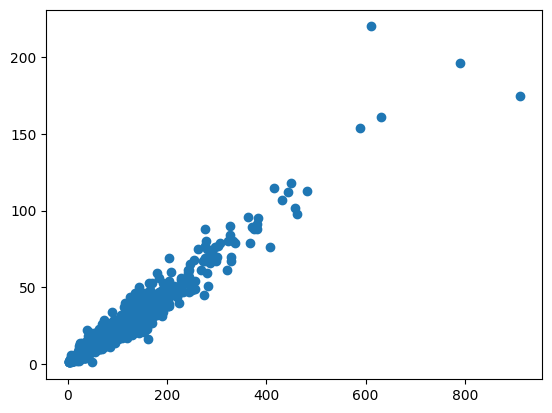

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df['text'].apply(len),df['text'].apply(lambda x:len(nltk.word_tokenize(x))))

In [ ]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['text'].apply(lambda x :nltk.sent_tokenize(x))
df['num_sentences'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

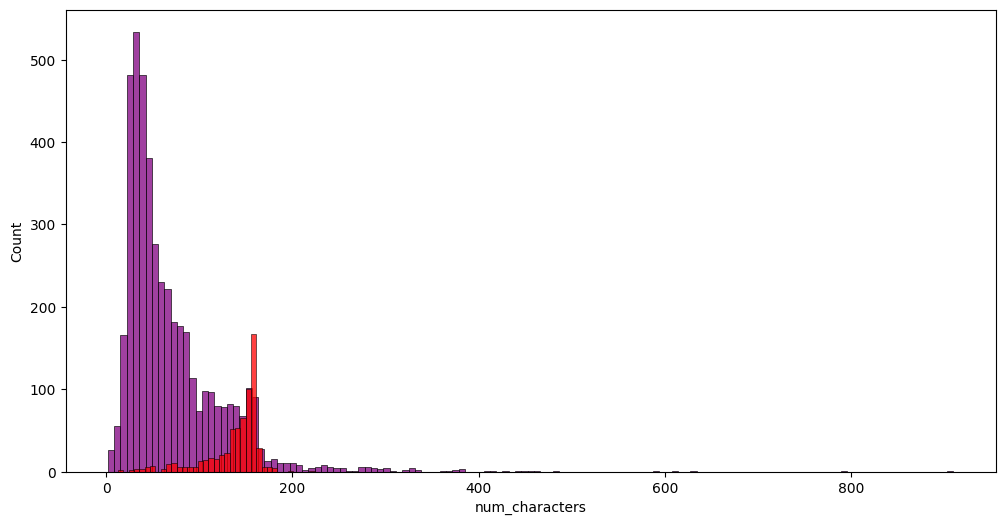

In [ ]:
import seaborn as sen 
plt.figure(figsize=(12,6))
sen.histplot(df[df['target']==0]['num_characters'],color='purple')
sen.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

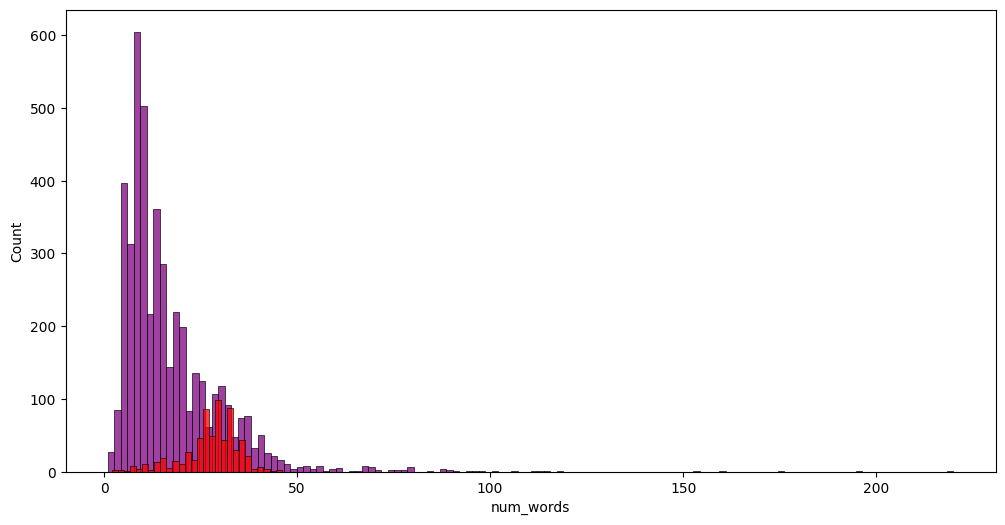

In [ ]:
import seaborn as sen 
plt.figure(figsize=(12,6))
sen.histplot(df[df['target']==0]['num_words'],color='purple')
sen.histplot(df[df['target']==1]['num_words'],color='red')

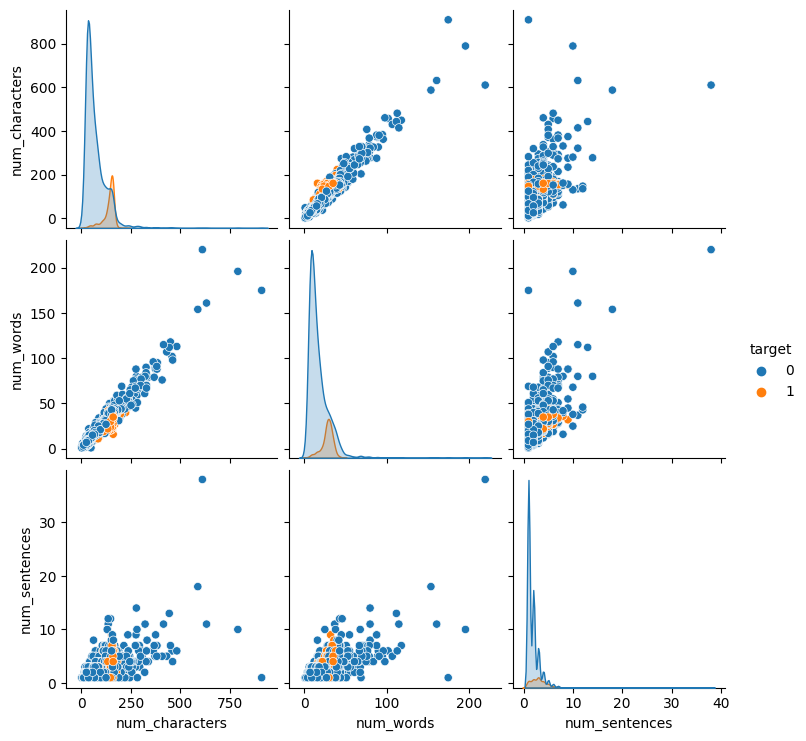

In [ ]:
sen.pairplot(df,hue='target')

<ipython-input-37-205449497a59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sen.heatmap(df.corr(),annot=True)


<Axes: >

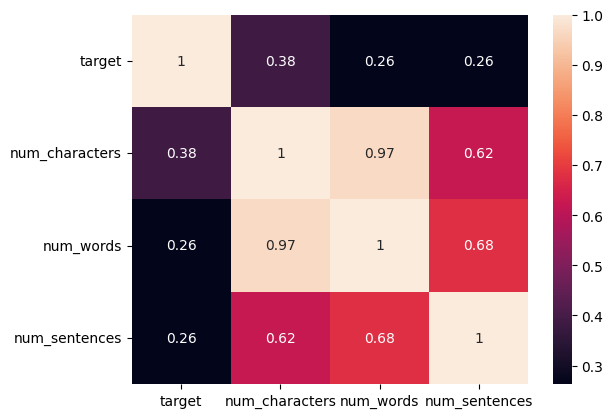

In [ ]:
sen.heatmap(df.corr(),annot=True)

In [ ]:
# due to high corelation we can't use all 3 fields 
# and num characters good fit with target




DATA PREPROCESSING

In [ ]:
# Lower case
#Tokenization
#Removing special
#Removing stop words and punctuation
# stemming 

In [ ]:
import string
from nltk.corpus import stopwords
def transform_text(text):

  #convert in lower case
  text = text.lower()
  #convert into list
  text = nltk.word_tokenize(text)
  # remove special characters 
  y = []
  for i in text:
    if i.isalnum():
        y.append(i)
  text = y[:]
  y.clear()

  for i in text:
     if i not in stopwords.words('english') and i not in string.punctuation:
       y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y) 

In [ ]:
# from nltk.corpus import stopwords
# stopwords.words('english')
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
#stopwords.words('english')
# remove all producing morphological variants of a root/base word
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
# ps.stem('eatting')

In [ ]:
transform_text('HI MANISH ITS ME ! %% do you know please writting yes if know  i loved youtube on ml .how about you ? ')

'hi manish know pleas writ ye know love youtub ml'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


WORD CLOUD

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 2500,height=2500,min_font_size=10,background_color='white')

spam messages word cloud

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))

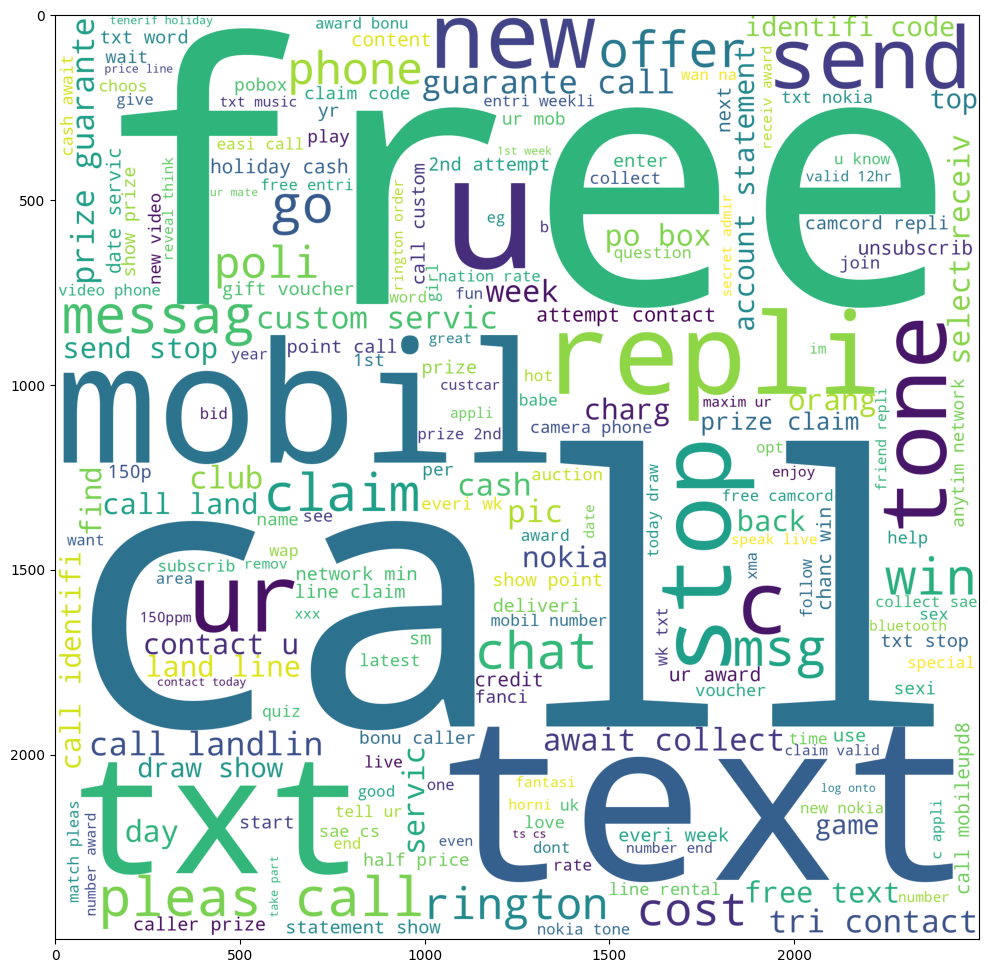

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(spam_wc)

ham message word cloud

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=""))

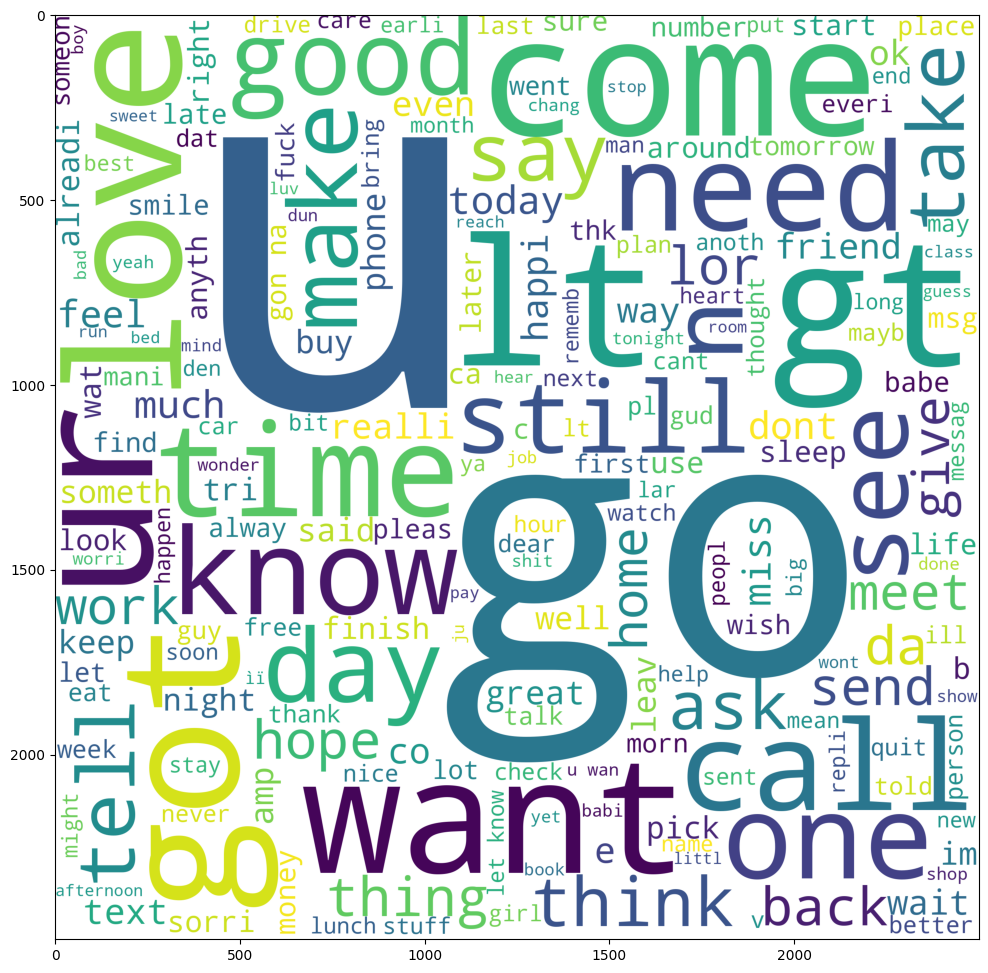

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(ham_wc)

spam messages list

In [ ]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
 for word in msg.split():
  spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
# sen.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0 ] , pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation ='vertical')
# plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
 for word in msg.split():
  ham_corpus.append(word)

In [ ]:
# sen.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0 ] , pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
# plt.xticks(rotation ='vertical')
# plt.show()

Model Building

In [ ]:
# first convert text to vectors

bag of word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) 


In [ ]:
X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
X.shape

(5169, 3000)

In [ ]:
#appending the num_character col to x
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state


In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y) 

In [ ]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

# for cv 0.8584686774941995
# [[965 160]
#  [ 23 145]]
# 0.47540983606557374

# for tfidf 0.9760247486465584
# [[1123    2]
#  [  29  139]]
# 0.985815602836879

0.8677494199535963
[[980 142]
 [ 29 142]]
0.5


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

# for cv 0.9590100541376644
# [[1125    0]
#  [  53  115]]
# 1.0


# for tfidf 0.9590100541376644
# [[1125    0]
#  [  53  115]]
# 1.0

0.9737045630317092
[[1137    1]
 [  33  122]]
0.991869918699187


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

#  for cv 0.9590100541376644
# [[1125    0]
#  [  53  115]]
# 1.0

# for tfidf 0.9760247486465584
# [[1123    2]
#  [  29  139]]
# 0.985815602836879

0.9767981438515081
[[1119    3]
 [  27  144]]
0.9795918367346939


In [ ]:
# tfidf with mnb

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc =SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
#lrc = LogisticRegression(solver = ' liblinear',penalty='11')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs ={
'SVM':svc,
'KN': knc,
'NB': mnb, 
'DT': dtc,
#'LR': lrc,
'RF': rfc,
'AdaBoost': abc,
'BgC': bc,
'ETC': etc,
'GBDT':gbdt,
'xgb':xgb

}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision 

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9752513534416086, 0.986013986013986)

In [ ]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("for ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  SVM
Accuracy -  0.9752513534416086
Precision -  0.986013986013986
for  KN
Accuracy -  0.9048723897911833
Precision -  1.0
for  NB
Accuracy -  0.9729311678267595
Precision -  1.0
for  DT
Accuracy -  0.9350348027842227
Precision -  0.8536585365853658
for  RF
Accuracy -  0.97138437741686
Precision -  0.9926470588235294
for  AdaBoost
Accuracy -  0.9621036349574633
Precision -  0.9295774647887324
for  BgC
Accuracy -  0.9605568445475638
Precision -  0.875
for  ETC
Accuracy -  0.97138437741686
Precision -  0.9652777777777778
for  GBDT
Accuracy -  0.9419953596287703
Precision -  0.9363636363636364
for  xgb
Accuracy -  0.9721577726218097
Precision -  0.9787234042553191


In [ ]:
performance_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [ ]:
performance_df.sort_values('Precision',ascending = False)

# for top 3000 value

# Algorithm	Accuracy	Precision   
# 1	KN	0.904872	1.000000
# 4	RF	0.974478	0.993377
# 2	NB	0.972158	0.993243
# 8	GBDT	0.956690	0.970149
# 7	ETC	0.973705	0.968354
# 9	xgb	0.941995	0.957265
# 0	SVM	0.971384	0.955975
# 5	AdaBoost	0.968291	0.949045
# 6	BgC	0.969838	0.918129
# 3	DT	0.935035	0.901639 


# for all value
# 1	KN	0.887858	1.000000
# 2	NB	0.951276	1.000000
# 4	RF	0.965971	1.000000
# 7	ETC	0.973705	0.993671
# 0	SVM	0.974478	0.981595
# 8	GBDT	0.946636	0.961832
# 5	AdaBoost	0.964424	0.950000
# 9	xgb	0.940449	0.937984
# 6	BgC	0.964424	0.909091
# 3	DT	0.936582	0.880282

,Algorithm,Accuracy,Precision
1,KN,0.904872,1.000000
2,NB,0.972931,1.000000
4,RF,0.971384,0.992647
0,SVM,0.975251,0.986014
9,xgb,0.972158,0.978723
7,ETC,0.971384,0.965278
8,GBDT,0.941995,0.936364
5,AdaBoost,0.962104,0.929577
6,BgC,0.960557,0.875000
3,DT,0.935035,0.853659


In [ ]:
performance_df.sort_values('Accuracy',ascending = False)

,Algorithm,Accuracy,Precision
0,SVM,0.975251,0.986014
2,NB,0.972931,1.000000
9,xgb,0.972158,0.978723
4,RF,0.971384,0.992647
7,ETC,0.971384,0.965278
5,AdaBoost,0.962104,0.929577
6,BgC,0.960557,0.875000
8,GBDT,0.941995,0.936364
3,DT,0.935035,0.853659
1,KN,0.904872,1.000000


According to analyses we use random forest (RF) or  KNeighbors (NB)

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,SVM,Accuracy,0.975251
1,KN,Accuracy,0.904872
2,NB,Accuracy,0.972931
3,DT,Accuracy,0.935035
4,RF,Accuracy,0.971384
5,AdaBoost,Accuracy,0.962104
6,BgC,Accuracy,0.960557
7,ETC,Accuracy,0.971384
8,GBDT,Accuracy,0.941995
9,xgb,Accuracy,0.972158


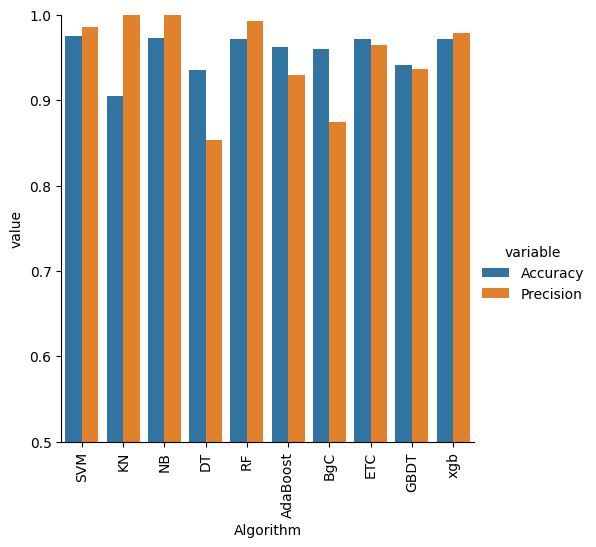

In [ ]:
sen.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
# Voting Classifier
# in voting we make combination of different algorithm with equal weightage's 
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
#knc = KNeighborsClassifier()
mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rf', rfc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.979891724671307
Precision 1.0


In [ ]:
# Applying stacking
# just like voting we make combination of different algorithm but different weightage's
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9837587006960556
Precision 0.9746835443037974


In [ ]:
#due to no one give us proper Precision with Accuracy we use  MultinomialNB

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
!pip3 install -q git+https://github.com/tensorflow/docs --user

  Preparing metadata (setup.py) ... done
